# Classification problem

In [ ]:
#%pip install ucimlrepo

## Implementazione k-NN from scratch

In [2]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [] # Predictions list 
        # predictions for each point in X_test 
        for test_point in X_test:
            distances = []
            for i, train_point in enumerate(self.X_train): 
                distance = np.sum(np.abs(test_point - train_point)) # manhattan distance
                distances.append((distance, self.y_train[i]))
            distances.sort() 
            # first k neighbors
            k_nearest = distances[:self.k] # shape = [(distance, class), ...] as many times as k 
            # classes of the k neighbors
            k_nearest_classes = [x[1] for x in k_nearest]
            # now i take the most common class among the k
            most_common = Counter(k_nearest_classes).most_common(1)
            predictions.append(most_common[0][0])
        return predictions

## Dataset handling and cleaning process

In [3]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# fetch hepatitis dataset
hepatitis = fetch_ucirepo(id=46)
features = hepatitis.data.features
targets = hepatitis.data.targets

df = pd.concat([features, targets], axis=1) # I join X and y in a single DataFrame
df = df.dropna().drop_duplicates() # remove rows with NaN or duplicates
#df.to_csv("hepatitis.csv", index=False)

# I separate features and target variable again
X = df.drop("Class", axis=1)
y = df["Class"]

X = X.apply(pd.to_numeric, errors="coerce") # num conversion
X = X.fillna(X.mean()) # Instead of NaN insert mean
X = X.values

# Encoding target variable
y = LabelEncoder().fit_transform(y) 

X.shape, y.shape 

((80, 19), (80,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# set shape
print(f"\nTraining set shape from scratch: {X_train.shape}")
print(f"Test set shape from scratch: {X_test.shape}")


Training set shape from scratch: (64, 19)
Test set shape from scratch: (16, 19)


## Implementation from scratch

In [7]:
print(f"Sk-learn training set shape: {X_train.shape}")
print(f"Sk-learn test set shape: {X_test.shape}")

knn = KNN(1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

acc = accuracy_score(y_test, predictions)
print(f"\nAccuracy from scratch: {acc:.4f}")

# Classification report
print("Classification report from scratch:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("\nConfusion matrix from scratch:")
print(confusion_matrix(y_test, predictions))


Sk-learn training set shape: (64, 19)
Sk-learn test set shape: (16, 19)

Accuracy from scratch: 0.8750
Classification report from scratch:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.92      0.92      0.92        13

    accuracy                           0.88        16
   macro avg       0.79      0.79      0.79        16
weighted avg       0.88      0.88      0.88        16


Confusion matrix from scratch:
[[ 2  1]
 [ 1 12]]


## Graph correct and incorrect predictions

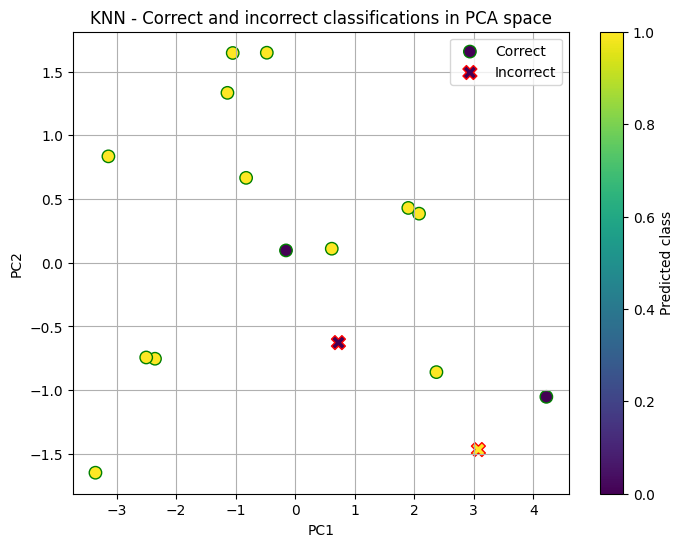

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Conversion to NumPy array
predictions = np.array(predictions)
y_test = np.array(y_test)

# PCA: I applied it to all data
pca = PCA(n_components=2)
pca.fit(X_scaled)  # Fit on normalized data

X_test_scaled = scaler.fit_transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Correct and incorrect classifications
correct = predictions == y_test

plt.figure(figsize=(8, 6))

# correct points
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1],
            c=predictions[correct], cmap='viridis',
            edgecolor='green', marker='o', label='Correct', s=80)

# incorrect points
plt.scatter(X_test_pca[~correct, 0], X_test_pca[~correct, 1],
            c=predictions[~correct], cmap='viridis',
            edgecolor='red', marker='X', label='Incorrect', s=100)

plt.title("KNN - Correct and incorrect classifications in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.colorbar(label="Predicted class")
plt.grid(True)
plt.show()


## I try a different value of k

In [9]:
knn3 = KNN(3)
knn3.fit(X_train, y_train)
predictions3 = knn3.predict(X_test)

acc = accuracy_score(y_test, predictions3)
print(f"\nAccuracy from scratch: {acc:.4f}")

# Classification report
print("Classification report from scratch:")
print(classification_report(y_test, predictions3))

# Confusion matrix
print("\n# Classification report from scratch:")
print(confusion_matrix(y_test, predictions3))



Accuracy from scratch: 0.8125
Classification report from scratch:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.86      0.92      0.89        13

    accuracy                           0.81        16
   macro avg       0.68      0.63      0.64        16
weighted avg       0.79      0.81      0.80        16


# Classification report from scratch:
[[ 1  2]
 [ 1 12]]


The results obtained are worse because we have few examples available and a single wrong prediction in class 0 greatly decreases the precision, recall, and f1-score values in that class.

## Sklearn implementation 

In [10]:
print(f"\nSk-learn training set shape: {X_train.shape}")
print(f"Sk-learn test set shape: {X_test.shape}")

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions_sk_learn = knn.predict(X_test)

acc = accuracy_score(y_test, predictions_sk_learn)
print(f"\nAccuracy sk-learn: {acc:.4f}")

print("\nClassification report sk-learn:")
print(classification_report(y_test, predictions_sk_learn))

print("\nConfusion matrix sk-learn:")
print(confusion_matrix(y_test, predictions_sk_learn))


Sk-learn training set shape: (64, 19)
Sk-learn test set shape: (16, 19)

Accuracy sk-learn: 0.8750

Classification report sk-learn:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.92      0.92      0.92        13

    accuracy                           0.88        16
   macro avg       0.79      0.79      0.79        16
weighted avg       0.88      0.88      0.88        16


Confusion matrix sk-learn:
[[ 2  1]
 [ 1 12]]


With sklearn the best k is automatically chosen (probably 1 or 2). The results are identical to the from scratch implementation.